In [19]:
%run ./src/mc/experiments.py
%run ./src/mc/distributions.py
%run ./src/mc/samplings.py

# 1. experiments.py 模拟仿真试验

Monte Carlo通过随机模拟实验来得到样本"频率"，进而推测整体"概率"。  
19世纪人们用投针试验的方法来决定圆周率\(\pi\)。随着计算机的普及，以大量模拟实验为核心思想的Monte Carlo得到了广泛使用。
    

背后原理： 大数定理

 The justification for a Monte Carlo method lies in the law of large numbers.

## 利用仿真模拟计算  $\pi$

本实验从-1 ~ +1范围中均匀随机抽样，产生x和y。 定义函数 is_inside_unit_circle，判断点(x,y)是否落在单位圆内部。

In [2]:
pi(N = 100000000) # 仿真模拟N次

frequency = 78546538/100000000 = 0.78546538
PI = 3.14186152


(0.78546538, 3.14186152)

## 双向击鼓传花

A、B、C、D、E五个人围成圆圈进行传球游戏，规定每人只能传给相邻的人（向左传或向右传）。   
由A开始游戏。

问：传球10次后，球回到A手中的概率是多少？  
请使用Monte Carlo方法进行计算，并与经典概率计算法比较

In [3]:
parcel(100000,5,10)

0.24732

经典概率解法：

$P = { { 2 + C_{10}^5 } \over { 2^ {10} } }= 24.8 \% $
        
两者值（近似）相同。仿真次数越多，值越相近。

<br/>


## 三个骰子点数

投掷3个色子。得分表如下：

|  Result  |     Reward ($)     |
|----------|:-------------:|
| 456 |  16  |
| 123 |  16  |
| ooo 三个相同 |  8  |
| oox 两个相同 |  2  |
| xyz 各不相同 |  0  |

计算各情况的概率，并确定单次的票价。

In [7]:
dict_pmf = dices(N = 10000)

,ooo,123,456,xyz,oox
Experimental Frequencies (f)N = 10000,0.0273,0.0287,0.0284,0.5006,0.415
Theoretical PMF (p),0.027778,0.027778,0.027778,0.498456,0.416667


In [8]:
# math expectation
dict_rewards = {'ooo': 8,
 '123': 16,
 '456': 16,
 'xyz': 0,
 'oox': 2}

E = 0
for key in dict_rewards:
    E = E + dict_pmf[key] * dict_rewards[key]
E

1.9620000000000002

Math expectation = 1.94. The ticket price must > 1.94. 3 or 4 dollars is preferred.

使用 scipy multinomial 计算理论值，符合多项式分布：

In [37]:
from scipy.stats import multinomial
rv = multinomial(3, [1/6]*6)
rv.pmf([1, 1, 1, 0, 0, 0]) # 123 或 456 的情况

0.02777777777777777

<hr/>

# 2. distributions.py 分布试验

## 二项式分布 - 高尔顿钉板实验


钉板上有20层钉板、21个落槽，请使用Monte Carlo算法求解球落入各个槽的概率(模拟1万次)。

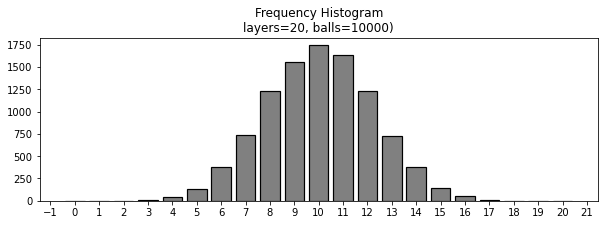

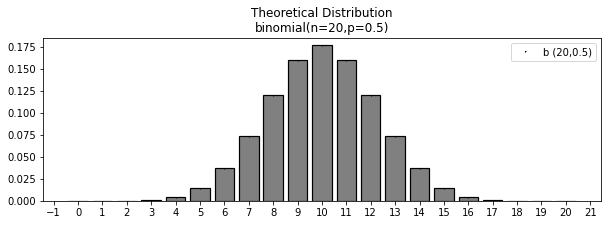

In [4]:
_ = galton_board(num_layers = 20, N = 10000, flavor=1)

经典概率解法：
$P(i) = {{ C_{L}^i } / { 2^L }}, i = \text { 0 to L } $, L 为钉板层数

# 指数分布 - 生存游戏

$X \sim E(\theta) $

PDF(概率密度函数)：

$ f(x; \theta) = \left\{
  \begin{array}{lr}
    {1 \over \theta} e ^{-x/\theta}, x>0\\
    0, else
  \end{array}
\right. $


元器件寿命为何符合指数分布？  
定义一个survival game（即每回合有p的死亡率；或电容在单位时间内被击穿的概率）的概率计算函数survival_dist。
取p = 0.001（每回合很小的死亡率），绘制出pmf曲线（离散、等比数组）

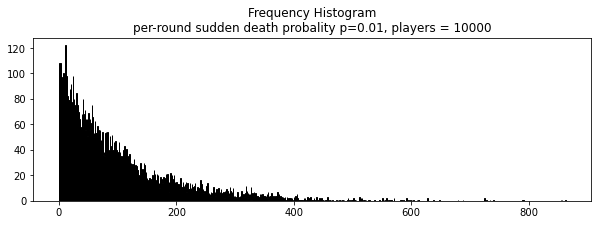

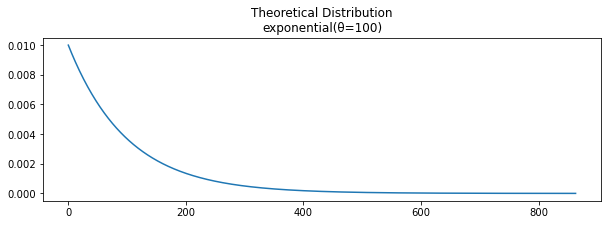

In [5]:
sudden_death(num_rounds = 1000, p = 0.01, N = 10000)

# Zipf 分布 - 曲别针实验


由哈佛大学的语言学家乔治·金斯利·齐夫（George Kingsley Zipf）于1949年发表的实验定律。它可以表述为：在自然语言的语料库里，一个单词出现的频率与它在频率表里的排名成反比。  
二八定律、长尾定理、长尾分布、帕累托分布等

回形针试验：每次随机抽取两个，连接在一起后放回

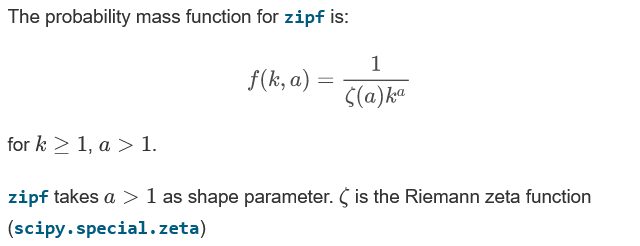

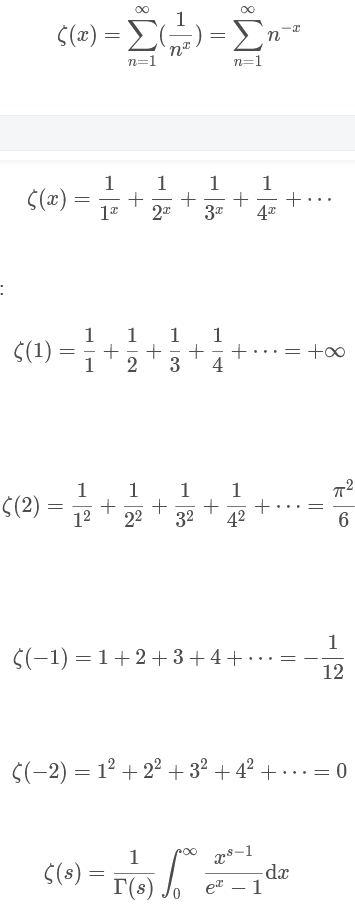

最后一个为复数域的解析延拓

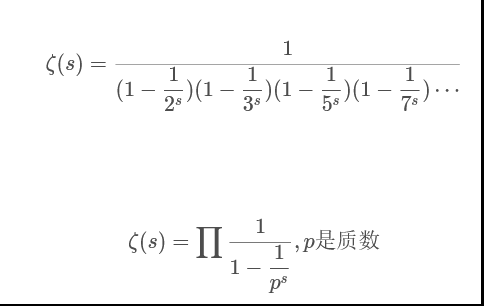

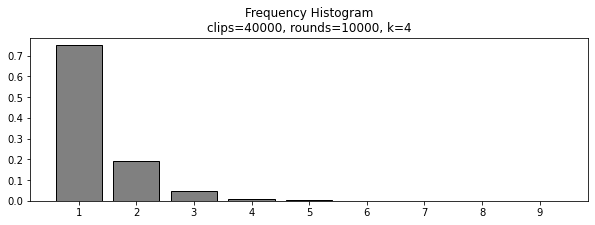

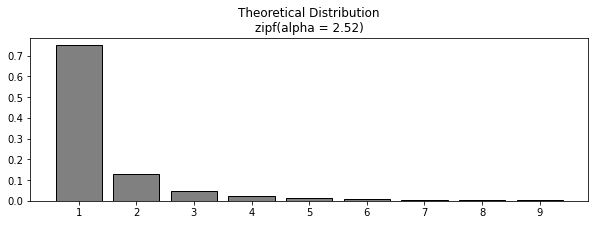

In [6]:
paper_clips(num_rounds = 10000, num_clips_k = 4)

<hr/>

# 3. samplings.py 抽样分布及假设检验统计量的分布试验

## 中心极限定理 CLT

----------- uniform -----------


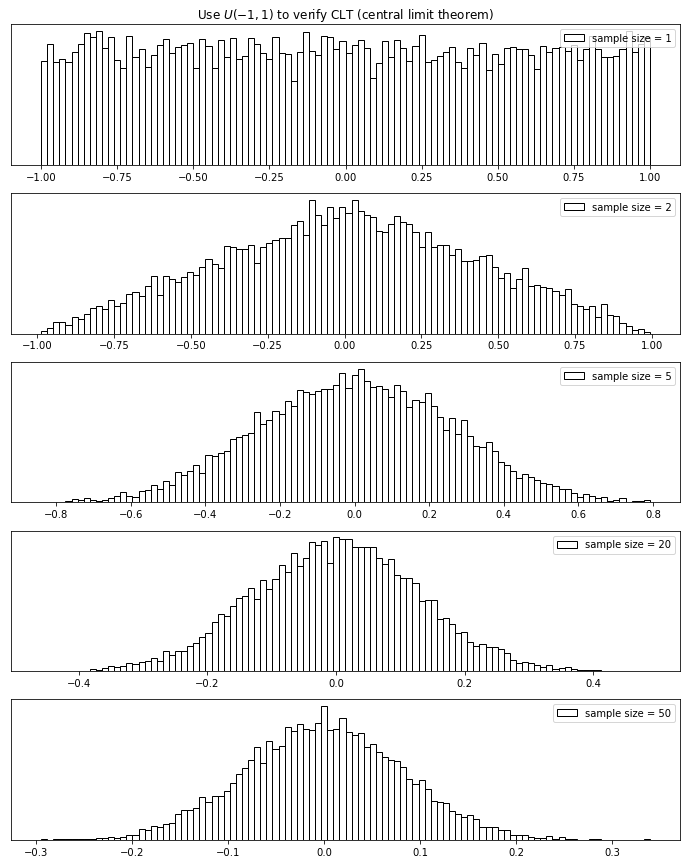

----------- expon -----------


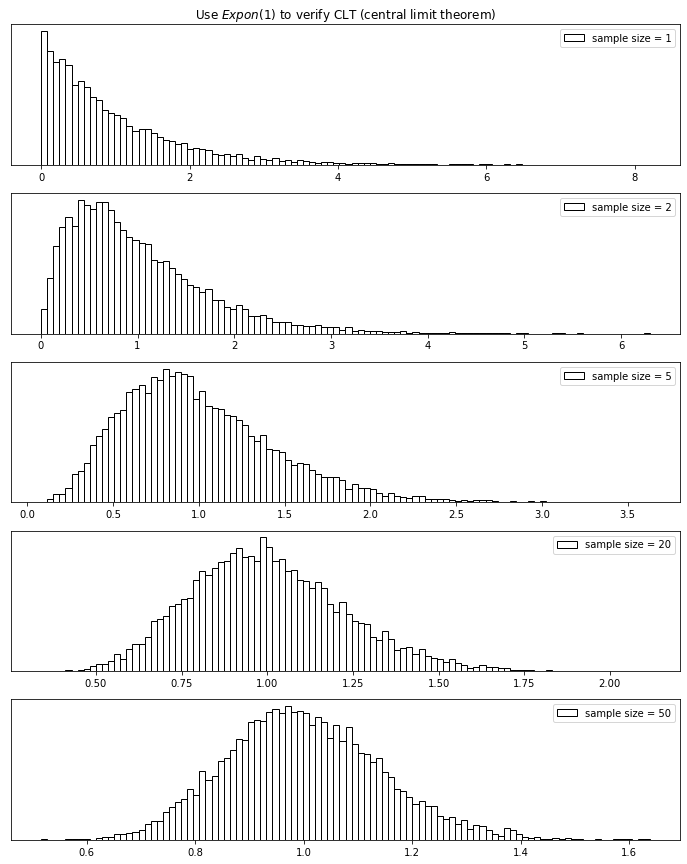

----------- poisson -----------


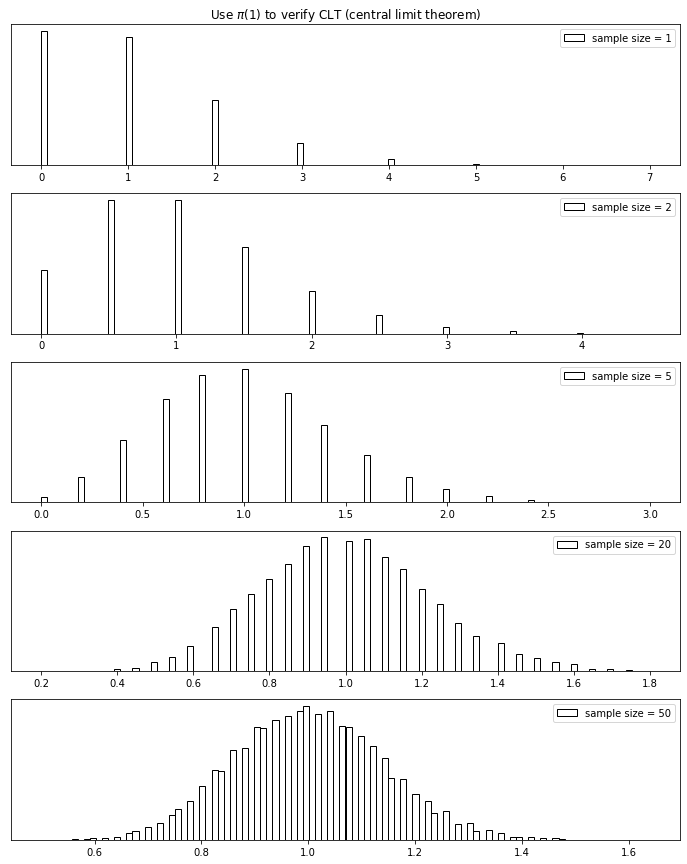

----------- coin -----------


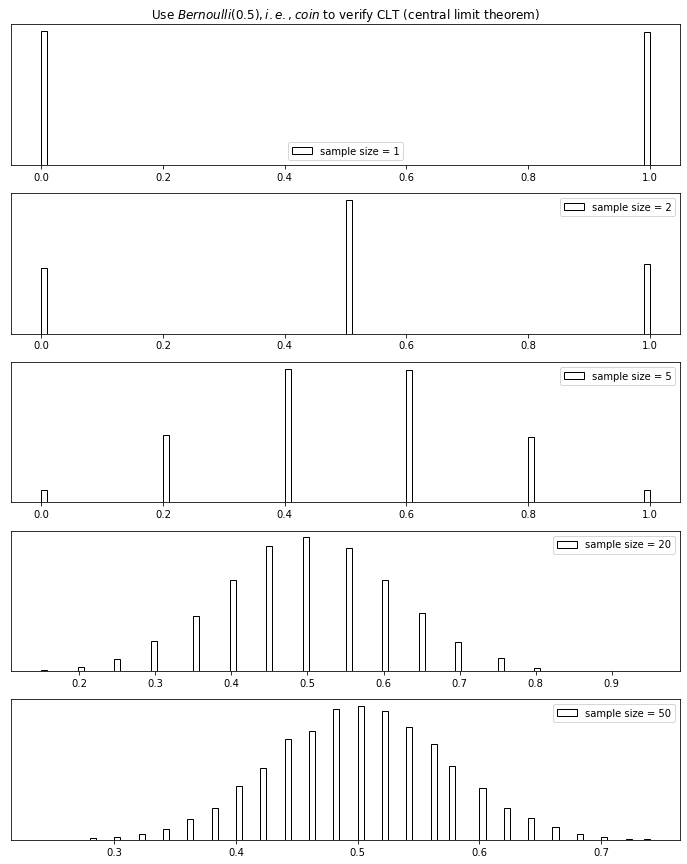

----------- tampered_coin -----------


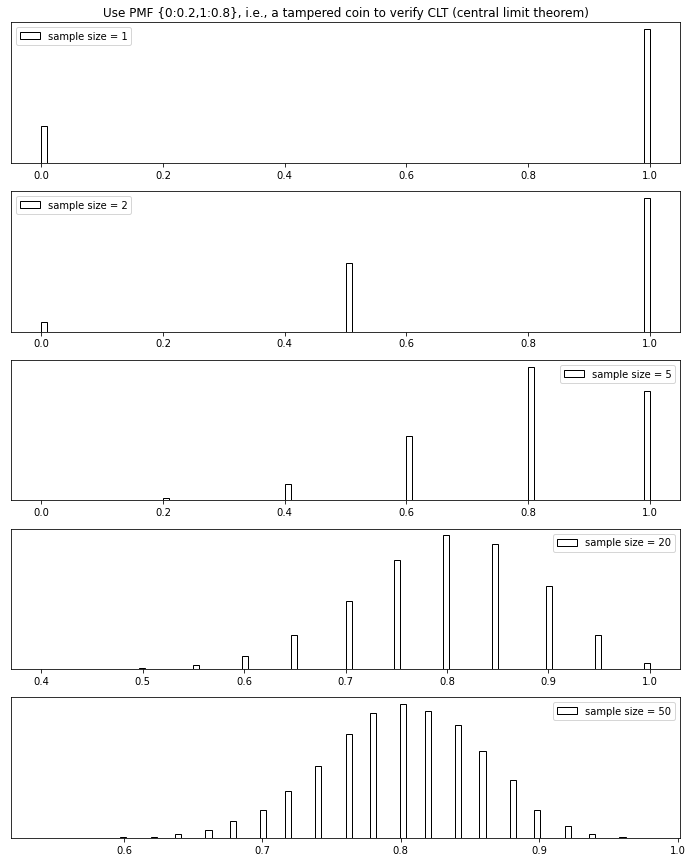

----------- dice -----------


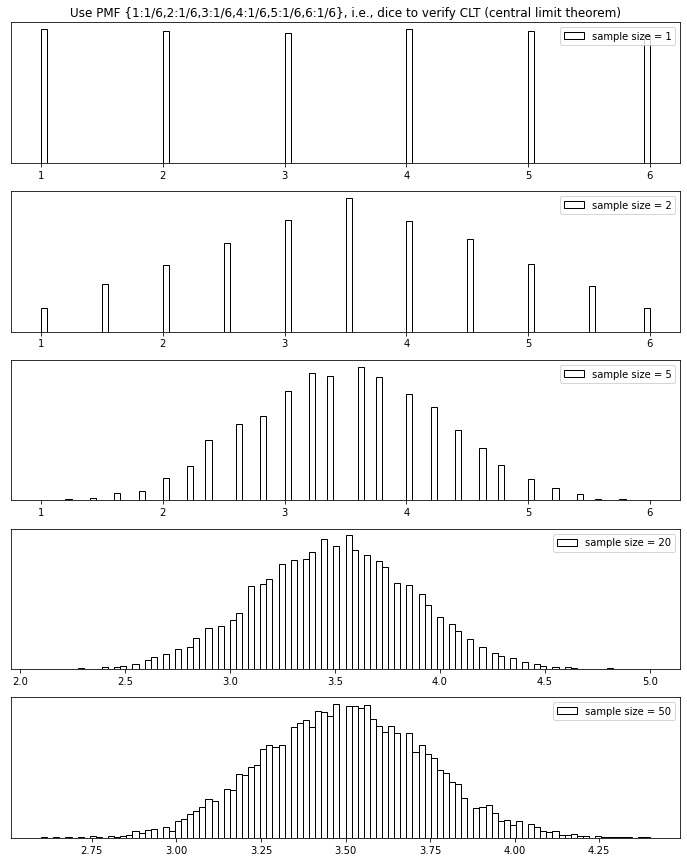

----------- tampered_dice -----------


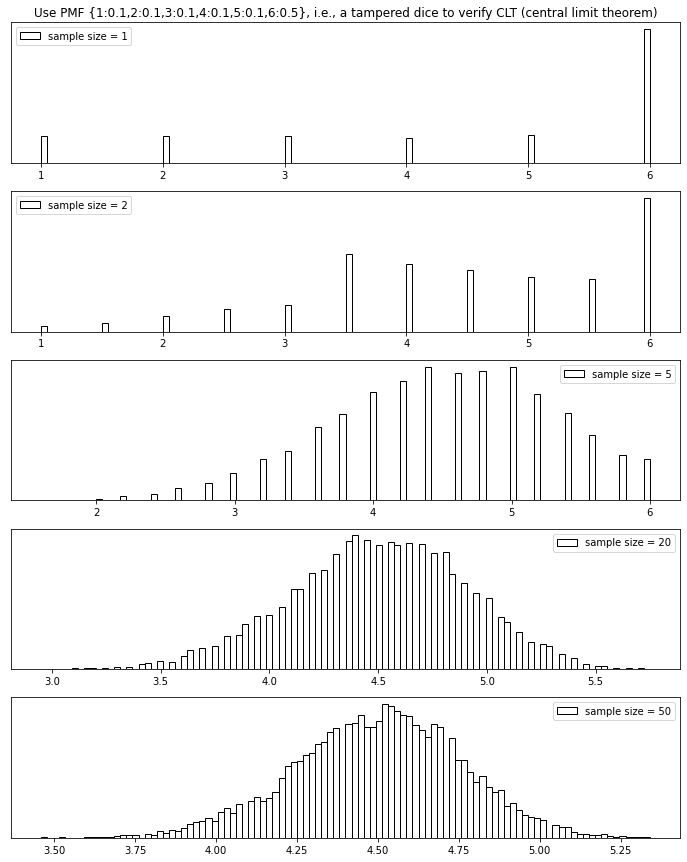

In [14]:
for dist in ['uniform', 'expon', 'poisson', 'coin', 'tampered_coin', 'dice', 'tampered_dice']:
    print('-----------', dist, '-----------')
    clt(dist, sample_size = [1,2,5,20,50], N = 10000)

## 验证 Pearson's Chi-Square Goodness-of-Fit Test

皮尔逊卡方拟合优度检验有一个基本的卡方分布假设，即

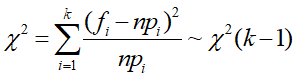 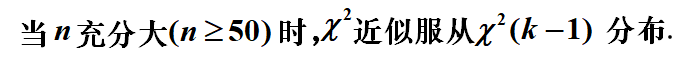

### 1. 下面用高尔顿钉板实验 b(n,p) 来验证

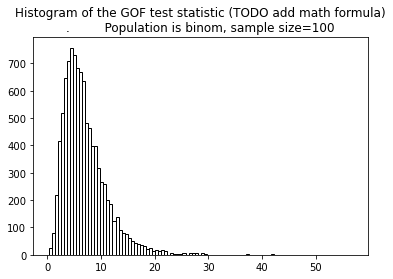

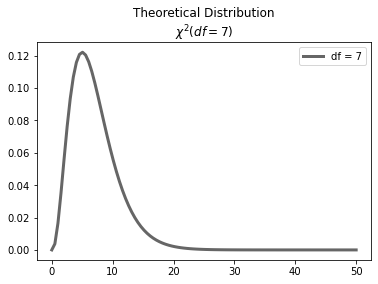

In [21]:
chisq_stat(dist = 'binom', K = 8, sample_size = 100, N = 10000)

### 2. 色子实验来验证

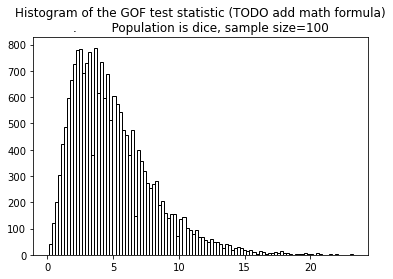

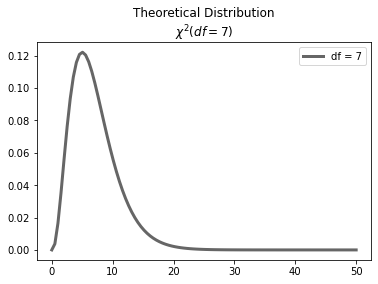

In [27]:
chisq_stat(dist = 'dice', K = 8, sample_size = 100, N = 10000)

验证完毕，抽样分布的结果符合 Pearson's Chi-Square 的理论分布假设

## 验证 ANOVA的F分布假设

F = MSTR/MSE ~ F(k-1, n-k)

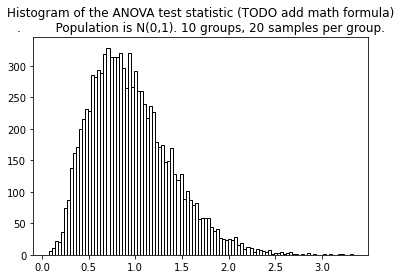

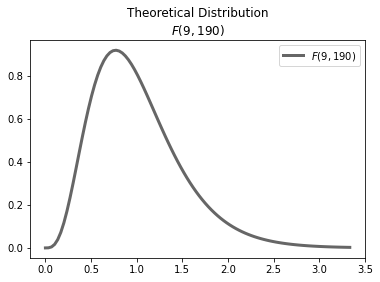

In [32]:
anova_stat(K = 10, n = 20, N = 10000)

验证完毕，抽样分布的结果符合F分布

## Kruskal-Wallis test

The Mann-Whitney or Wilcoxon test compares two groups while the Kruskal-Wallis test compares 3.  
Kruskal-Wallis test is a non-parametric version of one-way ANOVA. It is rank based.  
Kruskal-Wallis H: a X2 test statistic.

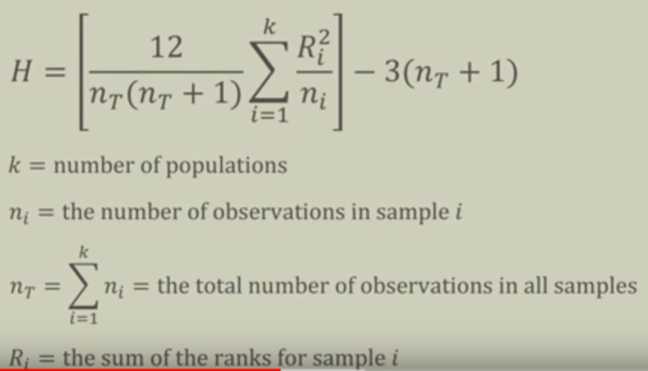


以下用MC检验，3组N(0,1) 或 U(0,1)总体 或 其它分布，相等观察数

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9012.70it/s]


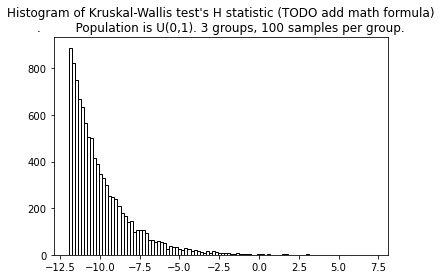

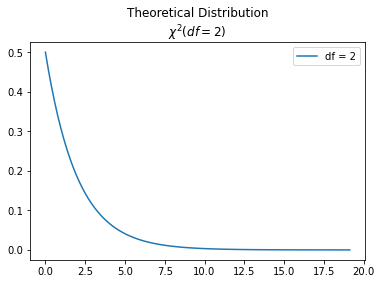

In [34]:
kw_stat()

# 符号检验

统计量符合二项式分布

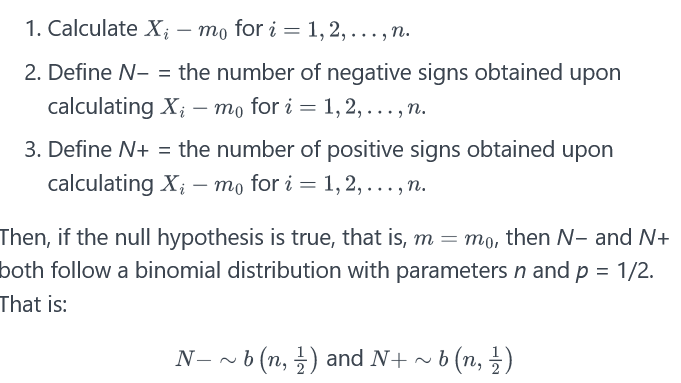

案例: 指数分布

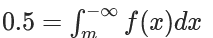

The theoretical median is m = $ \theta ln(2) $

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 62603.61it/s]


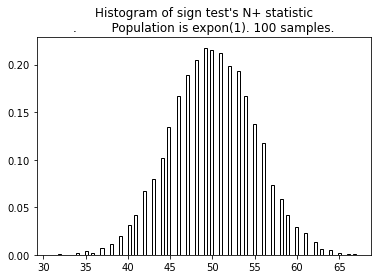

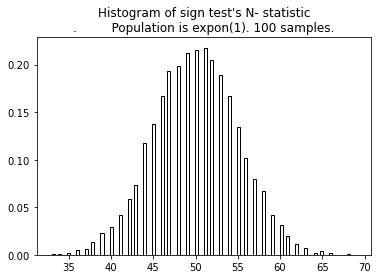

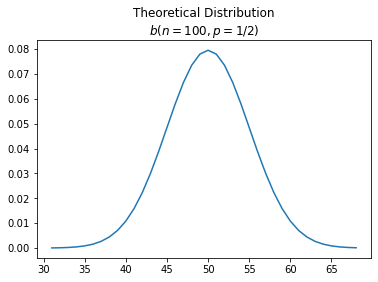

In [36]:
%run ./src/mc/samplings.py
sign_test_stat(dist = 'expon', n = 100, N = 10000)

<hr/><br/><br/>